## Import Library yang ingin Digunakan

In [45]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

## Read Dataset

In [46]:
akukahim = pd.read_csv ('toyota.csv')
akukahim.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


## Persiapan Dataset

In [47]:
akukahim.rename (index=str, columns={
    'mileage' : 'Kilometer Speedometer',
    'price' : 'harga',
    'tax' : 'pajak'
}, inplace=True)

## Drop Kolom yang tidak Dipakai

In [48]:
dropkolomkahim = akukahim.drop (['model','year','transmission','fuelType','mpg','engineSize'], axis=1)
dropkolomkahim

,harga,Kilometer Speedometer,pajak
0,16000,24089,265
1,15995,18615,145
2,13998,27469,265
3,18998,14736,150
4,17498,36284,145
...,...,...,...
6733,5500,30000,20
6734,4985,36154,125
6735,4995,46000,125
6736,3995,60700,125


## Menentukan Jumlah Cluster denga Elbow

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

Text(0, 0.5, 'Inertia')

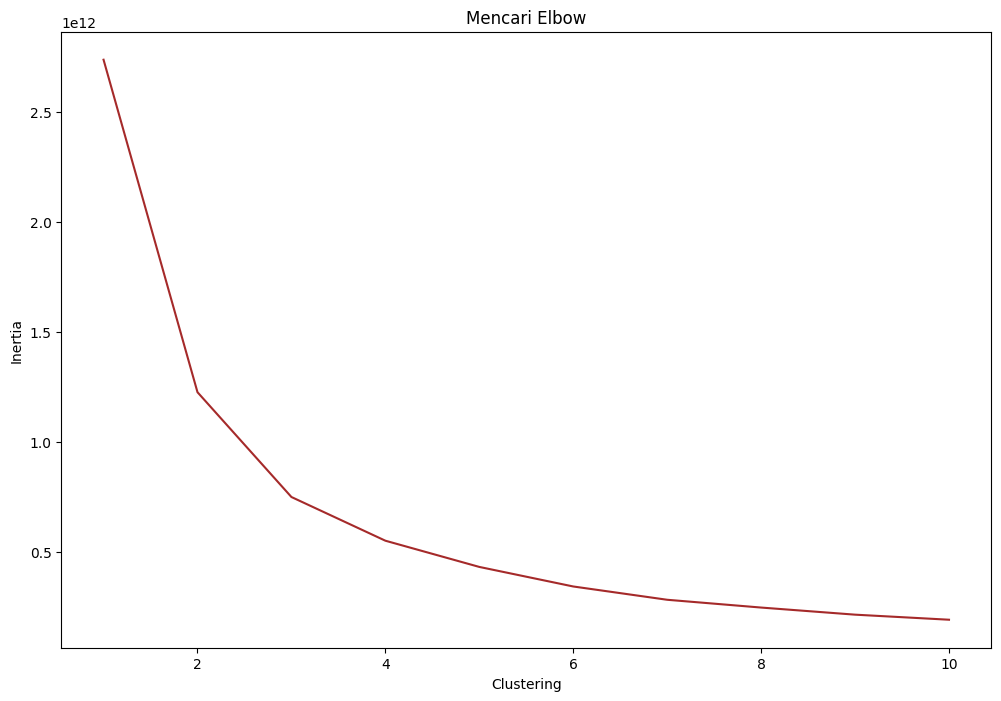

In [49]:
clustering = []
for i in range (1,11) :
    km = KMeans (n_clusters=i).fit (dropkolomkahim)
    clustering.append (km.inertia_)
    
fig, ax = plt.subplots (figsize = (12,8))
sns.lineplot (x=list(range(1,11)), y=clustering, ax=ax, color='brown')
ax.set_title ('Mencari Elbow')
ax.set_xlabel ('Clustering')
ax.set_ylabel ('Inertia')


## Proses Clustering

In [50]:
n_clustering = 4 
kmean = KMeans (n_clusters=n_clustering).fit(dropkolomkahim)
dropkolomkahim ['Labels'] = kmean.labels_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


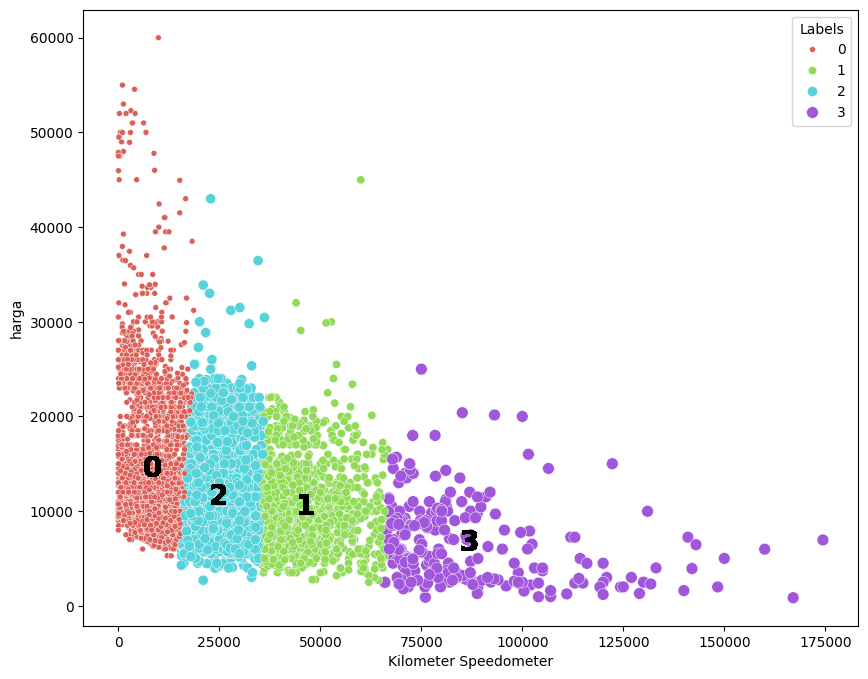

In [51]:
plt.figure(figsize=(10, 8))

# Pastikan 'Income', 'Score', dan 'Labels' ada dalam DataFrame X
sns.scatterplot(x=dropkolomkahim['Kilometer Speedometer'], y=dropkolomkahim['harga'], hue=dropkolomkahim['Labels'], markers=True, 
                size=dropkolomkahim['Labels'], palette=sns.color_palette('hls', n_clustering))

for label in dropkolomkahim['Labels']:
    plt.annotate(label,
                 (dropkolomkahim[dropkolomkahim['Labels']==label]['Kilometer Speedometer'].mean(),
                  dropkolomkahim[dropkolomkahim['Labels']==label]['harga'].mean()),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  size = 20, weight='bold',
                  color = 'black')

plt.show()